In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import types
import pandas as pd
import seaborn as sns
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9d9031db2f0947cd8a291e600442e811 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='5A-R8Utw3sM3nSdb8mKtjvuINfc71mDjFhGwcuPNy8u3',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_9d9031db2f0947cd8a291e600442e811.get_object(Bucket='challenge2-donotdelete-pr-j1fdqfs0svcmpz',Key='pmsm_temperature_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [2]:
df.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935,50.732001
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343,22.073125
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622,32.000000
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536,56.000000
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


<Figure size 432x288 with 0 Axes>

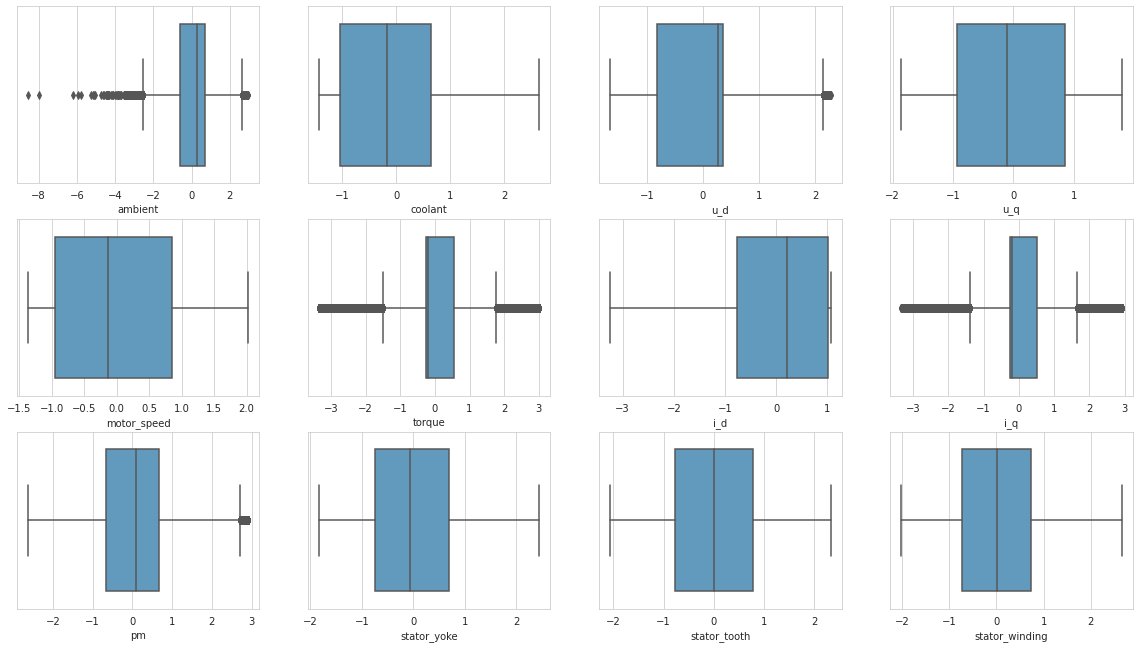

In [3]:
#boxplot
plt.tight_layout(pad=0.9)
plt.figure(figsize=(20,15)) 
plt.subplots_adjust(wspace = 0.2)
nbr_columns = 4 
nbr_graphs = len(df.columns)
nbr_rows = int(np.ceil(nbr_graphs/nbr_columns)) 
columns = list(df.columns.values) 
with sns.axes_style("whitegrid"):
    for i in range(0,len(columns)-1): 
        plt.subplot(nbr_rows,nbr_columns,i+1) 
        ax1=sns.boxplot(x= columns[i], data= df, orient="h",color=sns.color_palette("Blues")[3]) 
    plt.show() 

In [4]:
df.isnull().values.any()

False

In [6]:
# Nans
nans=pd.isnull(df).sum()
nans[nans>0]

Series([], dtype: int64)

In [7]:
df.corr()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
ambient,1.000000,0.434435,0.194754,0.087430,0.078283,-0.262264,0.005605,-0.260562,0.501496,0.451616,0.396742,0.301883,0.384565
coolant,0.434435,1.000000,0.178708,0.027851,-0.033332,-0.189617,0.108489,-0.186060,0.430548,0.874037,0.689003,0.509298,0.499669
u_d,0.194754,0.178708,1.000000,-0.027472,-0.233828,-0.821325,0.358517,-0.796586,-0.082564,0.041428,-0.066256,-0.150714,0.300771
u_q,0.087430,0.027851,-0.027472,1.000000,0.716897,-0.037262,-0.181855,-0.026348,0.101236,0.106186,0.149017,0.125445,-0.122260
motor_speed,0.078283,-0.033332,-0.233828,0.716897,1.000000,0.024517,-0.722914,0.006323,0.332419,0.182564,0.333909,0.393154,-0.166225
torque,-0.262264,-0.189617,-0.821325,-0.037262,0.024517,1.000000,-0.239059,0.996560,-0.072905,-0.092207,-0.011055,0.080981,-0.257446
i_d,0.005605,0.108489,0.358517,-0.181855,-0.722914,-0.239059,1.000000,-0.204230,-0.299227,-0.179903,-0.387712,-0.539924,0.142368
i_q,-0.260562,-0.186060,-0.796586,-0.026348,0.006323,0.996560,-0.204230,1.000000,-0.086486,-0.098753,-0.025191,0.060949,-0.256127
pm,0.501496,0.430548,-0.082564,0.101236,0.332419,-0.072905,-0.299227,-0.086486,1.000000,0.695014,0.768352,0.729561,0.156735
stator_yoke,0.451616,0.874037,0.041428,0.106186,0.182564,-0.092207,-0.179903,-0.098753,0.695014,1.000000,0.949898,0.845144,0.398021


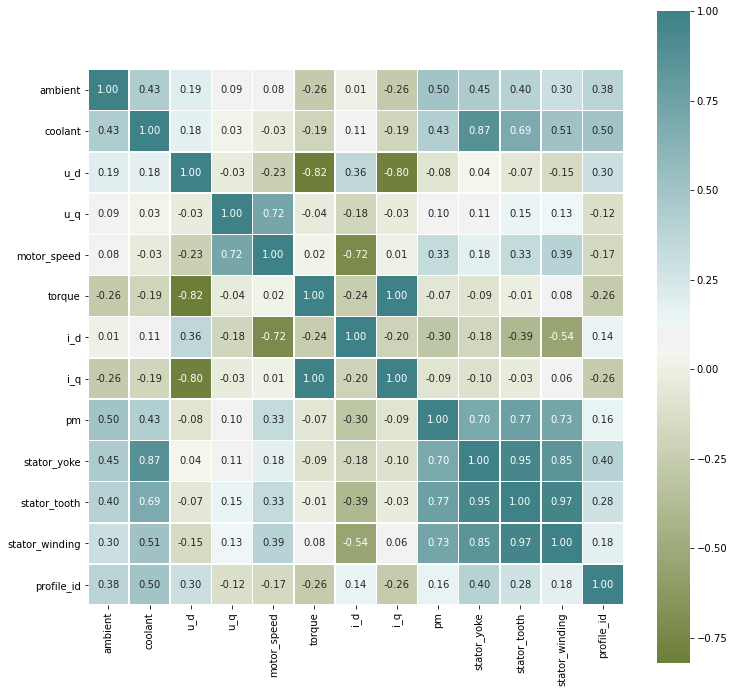

In [8]:
#korelasi data
import seaborn as sns
f,ax=plt.subplots(figsize=(12,12))
corr=df.corr()

sns.heatmap(corr, annot=True, linewidths=.5, fmt='.2f', 
            mask= np.zeros_like(corr,dtype=np.bool), 
            cmap=sns.diverging_palette(100,200,as_cmap=True), 
            square=True, ax=ax)

plt.show()

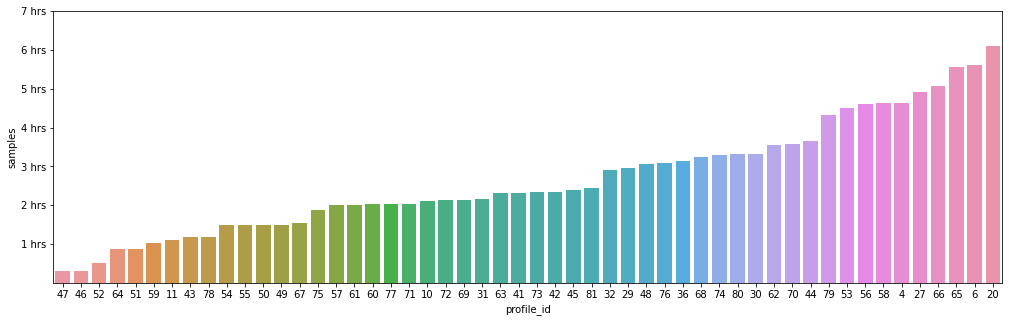

In [9]:
#lama sampling tiap id
fig = plt.figure(figsize=(17, 5))
grpd = df.groupby(['profile_id'])
_df = grpd.size().sort_values().rename('samples').reset_index()
ordered_ids = _df.profile_id.values.tolist()
sns.barplot(y='samples', x='profile_id', data=_df, order=ordered_ids)
tcks = plt.yticks(2*3600*np.arange(1, 8), [f'{a} hrs' for a in range(1, 8)]) # 2Hz sample rate

# Multiple linear Regression: Suhu Rotor(pm)

In [10]:
import statsmodels.api as sm
X=df.drop("pm", axis=1)
y=df["pm"]
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

training=df.copy()
lm=sm.OLS(y_train, X_train)

model=lm.fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     pm   R-squared (uncentered):                   0.772
Model:                            OLS   Adj. R-squared (uncentered):              0.772
Method:                 Least Squares   F-statistic:                          2.257e+05
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                        0.00
Time:                        04:08:20   Log-Likelihood:                     -5.3860e+05
No. Observations:              798456   AIC:                                  1.077e+06
Df Residuals:                  798444   BIC:                                  1.077e+06
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
ambient            0.2190      0.001    342.527      0.000       0.218       0.220
coolant           -0.2604      0.003    -76.542      0.000      -0.267      -0.254
u_d               -0.0344      0.001    -28.789      0.000      -0.037      -0.032
u_q               -0.3438      0.001   -289.199      0.000      -0.346      -0.341
motor_speed        0.3318      0.002    170.646      0.000       0.328       0.336
torque             0.0060      0.009      0.701      0.483      -0.011       0.023
i_d                0.1787      0.002    113.058      0.000       0.176       0.182
i_q                0.0113      0.008      1.401      0.161      -0.005       0.027
stator_yoke       -1.5665      0.011   -148.474      0.000      -1.587      -1.546
stator_tooth       4.5574      0.013    342.677      0.000       4.531       4.583
stator_winding    -2.2801      0.007   -345.878      0.000      -2.293      -2.267
profile_id        -0.0003    9.9e-06    -28.956      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    36686.704   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85186.503
Skew:                           0.287   Prob(JB):                         0.00
Kurtosis:                       4.494   Cond. No.                     1.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

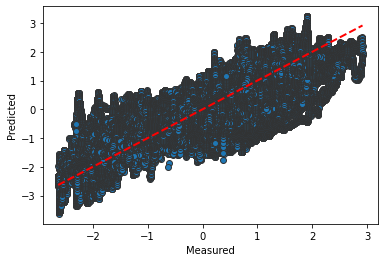

In [11]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=12)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0.2, 0.2, 0.2))
ax.plot([y.min(), y.max()], [y.min(), y.max()], '--r', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [14]:
#Root Mean Squared Error untuk Train
from sklearn.metrics import r2_score,mean_squared_error

rmse1=np.sqrt(mean_squared_error(y_train,model.predict(X_train)))
#Root Mean Squared Error untuk Test
rmse2=np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
rmse2,rmse1

(0.4733533088138882, 0.47331749729663786)

In [15]:
#Rsquare
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train,y_train)
cross_val_score1=cross_val_score(model, X_train, y_train, cv=10, scoring='r2').mean() #verified score value for train model
print('Verified R2 value for Training model: ' + str(cross_val_score1))

cross_val_score2=cross_val_score(model, X_test, y_test, cv=10, scoring='r2').mean() #verified score value for test model
print('Verified R2 value for Testing Model: ' + str(cross_val_score2))

Verified R2 value for Training model: 0.773960047526615
Verified R2 value for Testing Model: 0.774147504991695


In [16]:
RMSE1=np.sqrt(-cross_val_score(model, X_train, y_train, cv=10, 
                               scoring='neg_mean_squared_error')).mean() #verified RMSE score value for train model
print('Verified RMSE value for Training model: ' + str(RMSE1))

RMSE2=np.sqrt(-cross_val_score(model, X_test, y_test, cv=10, 
                               scoring='neg_mean_squared_error')).mean() #verified RMSE score value for test model
print('Verified RMSE value for Testing Model: ' + str(RMSE2))

Verified RMSE value for Training model: 0.4733221833174839
Verified RMSE value for Testing Model: 0.4733641515791997


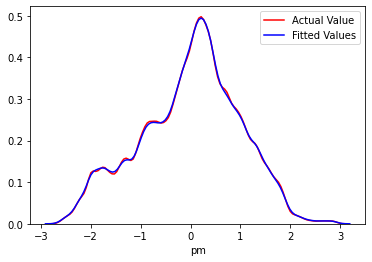

In [17]:
#Visualizsasi nilai y

import seaborn as sns
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_test, hist=False, color="b", label="Fitted Values" , ax=ax1);

# Multiple linear Regression: Suhu Stator Yoke(stator_yoke)

In [18]:
import statsmodels.api as sm
X=df.drop("stator_yoke", axis=1)
y=df["stator_yoke"]

In [19]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

training=df.copy()

In [20]:
lm=sm.OLS(y_train, X_train)

model=lm.fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            stator_yoke   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.693e+07
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                        0.00
Time:                        04:09:51   Log-Likelihood:                      1.2637e+06
No. Observations:              798456   AIC:                                 -2.527e+06
Df Residuals:                  798444   BIC:                                 -2.527e+06
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
ambient         -5.72e-05   7.16e-05     -0.799      0.425      -0.000    8.32e-05
coolant            0.2790      0.000   1605.050      0.000       0.279       0.279
u_d                0.0098      0.000     78.266      0.000       0.010       0.010
u_q                0.0133      0.000    102.137      0.000       0.013       0.014
motor_speed       -0.0558      0.000   -282.304      0.000      -0.056      -0.055
torque             0.0202      0.001     22.410      0.000       0.018       0.022
i_d               -0.0203      0.000   -123.179      0.000      -0.021      -0.020
i_q               -0.0088      0.001    -10.465      0.000      -0.010      -0.007
pm                -0.0172      0.000   -148.474      0.000      -0.017      -0.017
stator_tooth       1.1843      0.001   1736.869      0.000       1.183       1.186
stator_winding    -0.4180      0.001   -729.691      0.000      -0.419      -0.417
profile_id      2.318e-08   1.04e-06      0.022      0.982   -2.01e-06    2.05e-06
==============================================================================
Omnibus:                   267727.276   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3987855.730
Skew:                           1.207   Prob(JB):                         0.00
Kurtosis:                      13.679   Cond. No.                     1.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

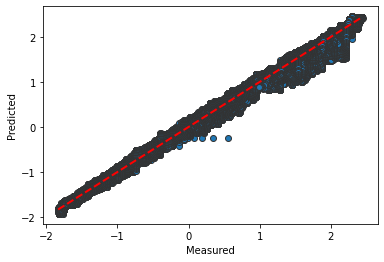

In [21]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=12)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0.2, 0.2, 0.2))
ax.plot([y.min(), y.max()], [y.min(), y.max()], '--r', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [22]:
#Root Mean Squared Error untuk Train
from sklearn.metrics import r2_score,mean_squared_error

rmse1=np.sqrt(mean_squared_error(y_train,model.predict(X_train)))


#Root Mean Squared Error untuk Test
rmse2=np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

rmse1, rmse2

(0.04970551507008327, 0.04957875095947046)

In [23]:
#Rsquare dan rmse
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train,y_train)
cross_val_score1=cross_val_score(model, X_train, y_train, cv=10, scoring='r2').mean() #verified score value for train model
print('Verified R2 value for Training model: ' + str(cross_val_score1))

cross_val_score2=cross_val_score(model, X_test, y_test, cv=10, scoring='r2').mean() #verified score value for test model
print('Verified R2 value for Testing Model: ' + str(cross_val_score2))

RMSE1=np.sqrt(-cross_val_score(model, X_train, y_train, cv=10, 
                               scoring='neg_mean_squared_error')).mean() #verified RMSE score value for train model
print('Verified RMSE value for Training model: ' + str(RMSE1))

RMSE2=np.sqrt(-cross_val_score(model, X_test, y_test, cv=10, 
                               scoring='neg_mean_squared_error')).mean() #verified RMSE score value for test model
print('Verified RMSE value for Testing Model: ' + str(RMSE2))

Verified R2 value for Training model: 0.9975355183181479
Verified R2 value for Testing Model: 0.9975418516785325
Verified RMSE value for Training model: 0.04970523136798862
Verified RMSE value for Testing Model: 0.049576546670487935


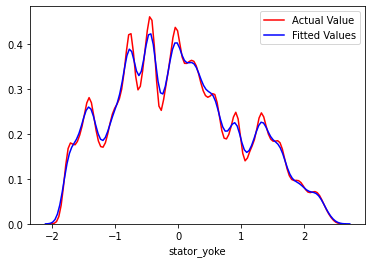

In [25]:
#Visualisasi nilai y

import seaborn as sns
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_test, hist=False, color="b", label="Fitted Values" , ax=ax1);

# Multiple linear Regression: Suhu Stator Tooth(stator_tooth)

In [26]:
import statsmodels.api as sm
X=df.drop("stator_tooth", axis=1)
y=df["stator_tooth"]

from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

training=df.copy()

lm=sm.OLS(y_train, X_train)

model=lm.fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           stator_tooth   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          4.767e+07
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                        0.00
Time:                        04:10:44   Log-Likelihood:                      1.4925e+06
No. Observations:              798456   AIC:                                 -2.985e+06
Df Residuals:                  798444   BIC:                                 -2.985e+06
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
ambient            0.0008   5.38e-05     14.873      0.000       0.001       0.001
coolant           -0.1391      0.000   -636.726      0.000      -0.140      -0.139
u_d               -0.0107   9.33e-05   -114.332      0.000      -0.011      -0.010
u_q               -0.0051    9.8e-05    -51.978      0.000      -0.005      -0.005
motor_speed        0.0448      0.000    304.592      0.000       0.045       0.045
torque            -0.0360      0.001    -53.327      0.000      -0.037      -0.035
i_d                0.0308      0.000    256.058      0.000       0.031       0.031
i_q                0.0233      0.001     36.777      0.000       0.022       0.025
pm                 0.0281   8.21e-05    342.677      0.000       0.028       0.028
stator_yoke        0.6677      0.000   1736.869      0.000       0.667       0.668
stator_winding     0.4510      0.000   1945.301      0.000       0.451       0.451
profile_id      2.487e-06   7.78e-07      3.195      0.001    9.61e-07    4.01e-06
==============================================================================
Omnibus:                   108283.265   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           461108.162
Skew:                          -0.617   Prob(JB):                         0.00
Kurtosis:                       6.512   Cond. No.                     1.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

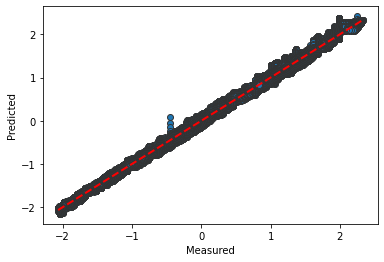

In [27]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=12)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0.2, 0.2, 0.2))
ax.plot([y.min(), y.max()], [y.min(), y.max()], '--r', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [28]:
#Root Mean Squared Error untuk Train
from sklearn.metrics import r2_score,mean_squared_error

rmse1=np.sqrt(mean_squared_error(y_train,model.predict(X_train)))


#Root Mean Squared Error untuk Test
rmse2=np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

rmse1, rmse2

(0.037322165821627395, 0.03737988907281778)

In [29]:
#Rsquare dan RMSE
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train,y_train)
cross_val_score1=cross_val_score(model, X_train, y_train, cv=10, scoring='r2').mean() #verified score value for train model
print('Verified R2 value for Training model: ' + str(cross_val_score1))

cross_val_score2=cross_val_score(model, X_test, y_test, cv=10, scoring='r2').mean() #verified score value for test model
print('Verified R2 value for Testing Model: ' + str(cross_val_score2))

RMSE1=np.sqrt(-cross_val_score(model, X_train, y_train, cv=10, 
                               scoring='neg_mean_squared_error')).mean() #verified RMSE score value for train model
print('Verified RMSE value for Training model: ' + str(RMSE1))

RMSE2=np.sqrt(-cross_val_score(model, X_test, y_test, cv=10, 
                               scoring='neg_mean_squared_error')).mean() #verified RMSE score value for test model
print('Verified RMSE value for Testing model: ' + str(RMSE2))

Verified R2 value for Training model: 0.9986061997832862
Verified R2 value for Testing Model: 0.9986003908233814
Verified RMSE value for Training model: 0.037321284826794004
Verified RMSE value for Testing model: 0.03737915950959478


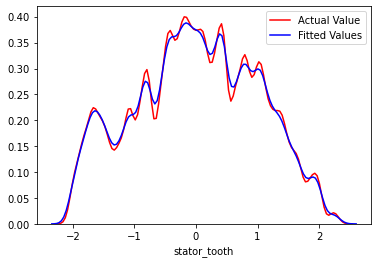

In [30]:
#Visualisasi nilai y

import seaborn as sns
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_test, hist=False, color="b", label="Fitted Values" , ax=ax1);

# Multiple linear Regression: stator_winding

In [31]:
import statsmodels.api as sm
X=df.drop("stator_winding", axis=1)
y=df["stator_winding"]

from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

training=df.copy()

lm=sm.OLS(y_train, X_train)

model=lm.fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         stator_winding   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          1.166e+07
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                        0.00
Time:                        04:11:28   Log-Likelihood:                      9.3306e+05
No. Observations:              798456   AIC:                                 -1.866e+06
Df Residuals:                  798444   BIC:                                 -1.866e+06
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
ambient         -0.0058      0.000    -53.242      0.000      -0.006      -0.006
coolant          0.1200      0.001    229.084      0.000       0.119       0.121
u_d              0.0247      0.000    131.652      0.000       0.024       0.025
u_q              0.0082      0.000     41.283      0.000       0.008       0.009
motor_speed     -0.0918      0.000   -310.271      0.000      -0.092      -0.091
torque           0.1055      0.001     77.673      0.000       0.103       0.108
i_d             -0.0960      0.000   -420.627      0.000      -0.096      -0.096
i_q             -0.0759      0.001    -59.491      0.000      -0.078      -0.073
pm              -0.0572      0.000   -345.878      0.000      -0.057      -0.057
stator_yoke     -0.9570      0.001   -729.691      0.000      -0.960      -0.954
stator_tooth     1.8311      0.001   1945.301      0.000       1.829       1.833
profile_id   -7.148e-06   1.57e-06     -4.558      0.000   -1.02e-05   -4.07e-06
==============================================================================
Omnibus:                    78065.687   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           233508.554
Skew:                           0.525   Prob(JB):                         0.00
Kurtosis:                       5.432   Cond. No.                     1.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

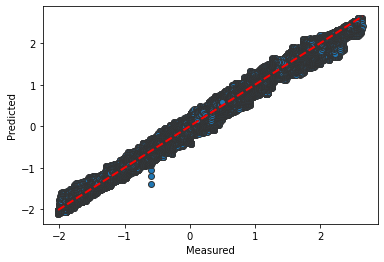

In [32]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=12)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0.2, 0.2, 0.2))
ax.plot([y.min(), y.max()], [y.min(), y.max()], '--r', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [33]:
#Root Mean Squared Error untuk Train
from sklearn.metrics import r2_score,mean_squared_error

rmse1=np.sqrt(mean_squared_error(y_train,model.predict(X_train)))


#Root Mean Squared Error untuk Test
rmse2=np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

rmse1, rmse2

(0.07520601933217598, 0.0754842244528655)

In [34]:
#Rsquare dan RMSE
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train,y_train)
cross_val_score1=cross_val_score(model, X_train, y_train, cv=10, scoring='r2').mean() #verified score value for train model
print('Verified R2 value for Training model: ' + str(cross_val_score1))

cross_val_score2=cross_val_score(model, X_test, y_test, cv=10, scoring='r2').mean() #verified score value for test model
print('Verified R2 value for Testing Model: ' + str(cross_val_score2))

RMSE1=np.sqrt(-cross_val_score(model, X_train, y_train, cv=10, 
                               scoring='neg_mean_squared_error')).mean() #verified RMSE score value for train model
print('Verified RMSE value for Training model: ' + str(RMSE1))

RMSE2=np.sqrt(-cross_val_score(model, X_test, y_test, cv=10, 
                               scoring='neg_mean_squared_error')).mean() #verified RMSE score value for test model
print('Verified RMSE value for Testing Model: ' + str(RMSE2))

Verified R2 value for Training model: 0.9943245910197558
Verified R2 value for Testing Model: 0.994285982427057
Verified RMSE value for Training model: 0.07520381308675231
Verified RMSE value for Testing Model: 0.07548183257579619


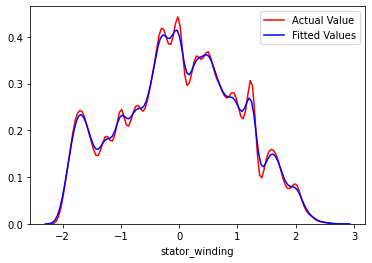

In [35]:
#Visualisasi nilai y

import seaborn as sns
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_test, hist=False, color="b", label="Fitted Values" , ax=ax1);